### 1. Importing necessary libraries 📙

In [1]:
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# display all columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split 

import mlflow


In [2]:
df=pd.read_csv('../data/X_train.csv')

In [3]:
df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


### 2. Train and test data 🧑‍🏫

In [4]:
# dropping SalePrice and Id columns
y = df['SalePrice']
X = df.drop(['Id', 'SalePrice'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [6]:
print("=========Training Data=========")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print("=========Testing Data=========")
print(f"y_test shape: {y_test.shape}")
print(f"X_test shape: {X_test.shape}")

=========Training Data=========
X_train shape: (978, 82)
y_train shape: (978,)
=========Testing Data=========
y_test shape: (482,)
X_test shape: (482, 82)


### 3. Selecting the important features ❗
For selecting features based on importance weights.

In [7]:
feature_select_model=SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_select_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [8]:
# features that are important
selected_features = X_train.columns[feature_select_model.get_support()]

print(f'total_features: {X_train.shape[1]}')
print(f'selected_features: {len(selected_features)}')



total_features: 82
selected_features: 18


#### 4. Selecting the important features only 📜

In [9]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [10]:
X_train.head()

,MSSubClass,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond
615,0.382353,0.363636,0.555556,0.786885,0.0,0.50,1.00,1.0,0.434898,0.406532,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0
613,0.000000,0.409091,0.444444,0.016393,0.0,0.75,0.25,1.0,0.457883,0.428018,0.000000,0.333333,0.000000,0.2,0.0,0.000000,0.00,0.0
1303,0.000000,0.818182,0.666667,0.032787,0.0,0.75,0.75,1.0,0.596626,0.557711,0.000000,0.666667,0.000000,0.2,0.8,0.666667,0.75,1.0
486,0.000000,0.363636,0.444444,0.704918,1.0,0.50,0.25,1.0,0.441659,0.412852,0.333333,0.333333,0.000000,0.2,0.8,0.666667,0.50,1.0
561,0.000000,0.409091,0.444444,0.524590,0.0,0.75,0.75,1.0,0.539343,0.504164,0.333333,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0


In [11]:
y_train.head()

615     11.831379
613     11.898188
1303    12.354493
486     11.957611
561     12.043554
Name: SalePrice, dtype: float64

### 5. Training model 🏃

In [12]:
clf = Lasso(alpha=0.0005, random_state=0)
clf.fit(X_train, y_train)

Lasso(alpha=0.0005, random_state=0)

### 6. Prediction 🪄

In [13]:
X_test

,MSSubClass,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond
892,0.000000,0.272727,0.555556,0.065574,1.0,0.50,0.25,1.0,0.439892,0.411200,0.000000,0.333333,0.000000,0.2,0.8,0.666667,0.25,1.0
1105,0.235294,1.000000,0.777778,0.262295,0.0,1.00,0.75,1.0,0.568437,0.728921,0.333333,0.666667,0.666667,0.6,0.8,0.666667,0.50,1.0
413,0.058824,0.181818,0.444444,1.000000,0.0,0.50,0.25,1.0,0.425446,0.397696,0.000000,0.333333,0.333333,0.8,0.4,0.333333,0.50,1.0
522,0.176471,0.136364,0.555556,0.934426,0.0,0.50,0.25,1.0,0.416506,0.568066,0.000000,0.333333,0.666667,0.8,0.4,0.333333,0.50,1.0
1036,0.000000,0.863636,0.888889,0.032787,1.0,1.00,1.00,1.0,0.597562,0.558586,0.333333,1.000000,0.333333,1.0,0.8,1.000000,0.75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,0.176471,0.272727,0.444444,0.967213,0.0,0.50,0.25,1.0,0.290679,0.472758,0.000000,0.333333,0.333333,0.8,0.8,0.333333,0.25,1.0
390,0.176471,0.227273,0.444444,0.967213,0.0,0.50,0.25,1.0,0.399941,0.498517,0.333333,0.333333,0.000000,0.2,0.4,0.333333,0.25,1.0
1409,0.235294,0.545455,0.666667,0.295082,0.0,0.75,0.25,1.0,0.495178,0.649207,0.000000,0.333333,0.333333,0.6,0.8,1.000000,0.50,1.0
847,0.000000,0.636364,0.444444,0.622951,0.0,0.50,0.75,1.0,0.359675,0.336216,0.333333,0.333333,0.333333,0.4,0.8,0.333333,0.25,1.0


In [14]:
pred = clf.predict(X_test)
pred

array([11.80640814, 12.7126474 , 11.67427228, 11.91330934, 12.72614295,
       11.20619103, 12.32034377, 11.91055894, 11.20782319, 11.70056182,
       11.88922335, 11.69057657, 11.45595325, 12.28095536, 12.1229153 ,
       11.82756417, 12.23218824, 11.78009751, 11.63223299, 12.29479439,
       12.0989212 , 12.26230741, 12.13329972, 11.7616337 , 12.27648512,
       11.89027102, 12.19073649, 11.61363369, 12.10277543, 12.20127529,
       11.72110796, 12.51365441, 12.20872517, 11.55534228, 12.49937807,
       11.89288545, 11.96848929, 12.29476739, 12.63929258, 11.45144587,
       11.74884023, 12.34560551, 11.63689945, 12.63975607, 11.73799838,
       11.88139485, 11.62604857, 11.68462701, 12.88325868, 11.77745138,
       11.63416786, 12.22626355, 11.68099476, 12.71694994, 12.01348273,
       12.36939996, 12.23669339, 11.97027385, 11.88128047, 11.57438244,
       11.10965154, 11.91026152, 12.66195362, 12.44913227, 12.65330591,
       12.3002314 , 11.549599  , 12.71115739, 11.62156165, 12.00

#### 7. Performance metric (R2-Score) 📈

In [15]:
r2_score(y_test, pred, sample_weight=None)

0.8789105057893952

### 8. Visually comparing actual vs predicted values 📊

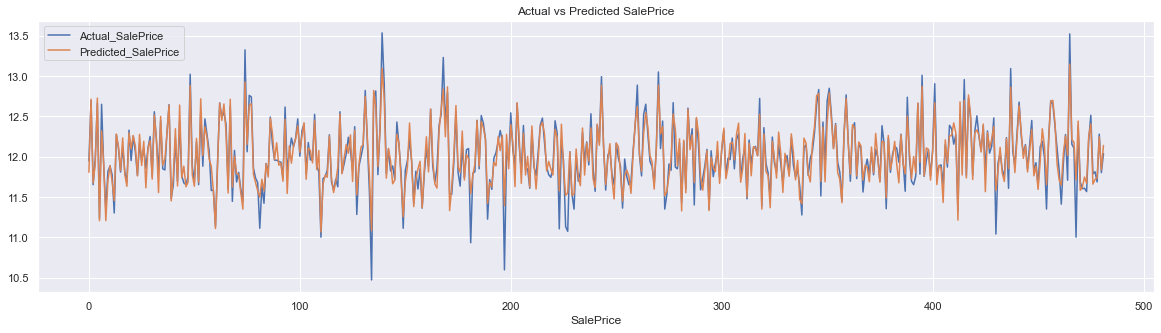

In [24]:
sns.lineplot(x= [x for x in range(0,len(y_test))],y=y_test)
sns.lineplot(x= [x for x in range(0,len(y_test))],y=pred)
plt.title('Actual vs Predicted SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('')
sns.set(rc={'figure.figsize':(20,5)})
plt.legend(['Actual_SalePrice', 'Predicted_SalePrice'])
plt.show()

# plt.xlabel('Actual_SalePrice')
# plt.title('Actual_SalePrice')
# sns.set(rc={'figure.figsize':(20,5)})
# plt.show()

### **Thank You for staying with me so far** 😃

<p align='center'>
<img src='https://github.com/SyedArsalanAmin/Graphics/blob/master/icons/star.png'?raw=true' alt='drawing' width='300' height='300'/>
</p>